### загрузка библиотек

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### загрузка данных

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### полезные функции

In [3]:
def missing_values_table(df):
    
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Отсутствующих данных', 1 : '% от всех данных'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от всех данных', ascending=False).round(1)
        
        print ("Было выбрано " + str(df.shape[1]) + " колонок.\n"      
            "Среди их " + str(mis_val_table_ren_columns.shape[0]) +
              " с отсутствующими данными.")
        
        return mis_val_table_ren_columns

In [4]:
def age_gr(val):
    if 20 <= val <= 29:
        return 1
    elif 30 <= val <= 39:
        return 2
    elif 40 <= val <= 49:
        return 3
    elif 50 <= val <= 59:
        return 4
    elif 60 <= val <= 69:
        return 5
    elif 70 <= val <= 79:
        return 6
    elif 80 <= val <= 84:
        return 7

### анализ загруженных данных

In [5]:
sample_submission.shape

(36349, 2)

In [6]:
df_test.shape

(36349, 18)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [8]:
df_train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [10]:
sample_submission.head(5)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
missing_values_table(data)

Было выбрано 20 колонок.
Среди их 1 с отсутствующими данными.


,Отсутствующих данных,% от всех данных
education,478,0.4


In [14]:
data.nunique(dropna=False)

client_id           110148
app_date               120
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
sample                   2
default                  2
dtype: int64

In [15]:
num_cols = ['age', 'score_bki', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

<AxesSubplot:xlabel='income', ylabel='Count'>

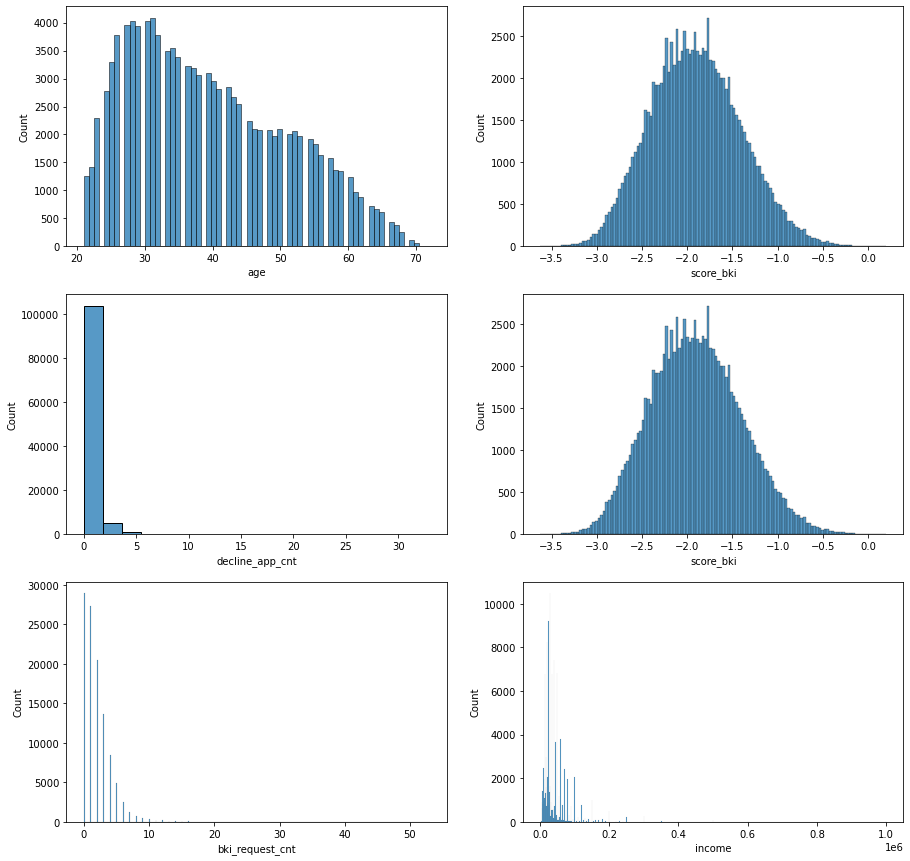

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

sns.histplot(data=data['age'], ax=axes[0,0])
sns.histplot(data=data['score_bki'], ax=axes[0,1])
sns.histplot(data=data['decline_app_cnt'], ax=axes[1,0])
sns.histplot(data=data['score_bki'], ax=axes[1,1])
sns.histplot(data=data['bki_request_cnt'], ax=axes[2,0])
sns.histplot(data=data['income'], ax=axes[2,1])

Text(0.5, 1.0, 'income')

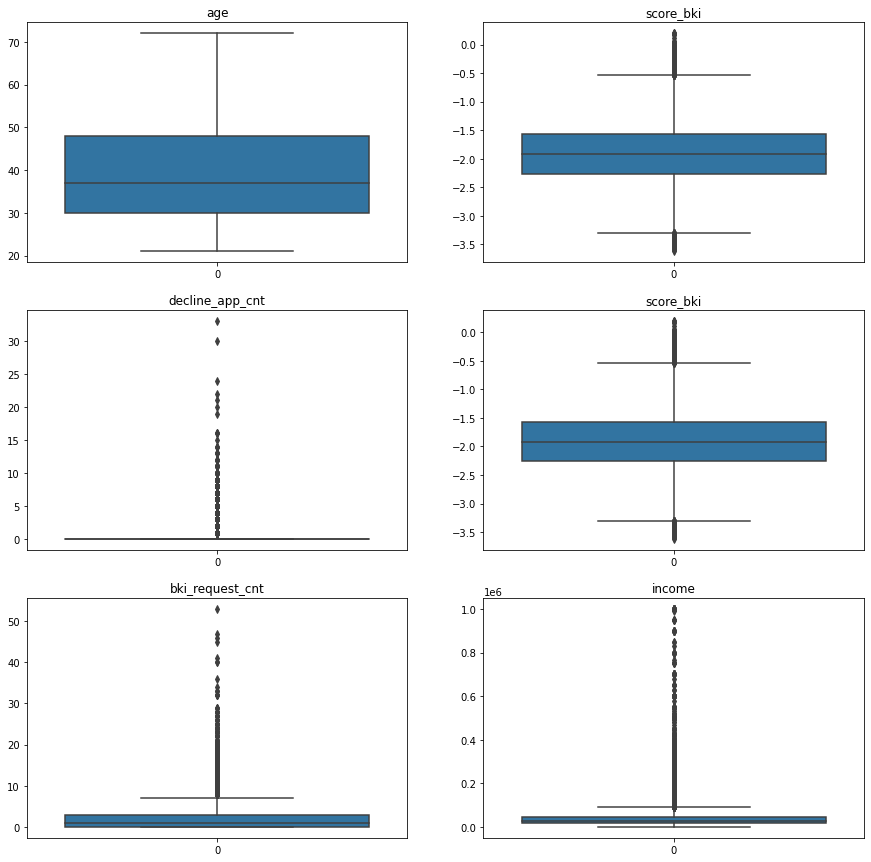

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

sns.boxplot(data=data['age'], ax=axes[0,0]).set_title("age")
sns.boxplot(data=data['score_bki'], ax=axes[0,1]).set_title("score_bki")
sns.boxplot(data=data['decline_app_cnt'], ax=axes[1,0]).set_title("decline_app_cnt")
sns.boxplot(data=data['score_bki'], ax=axes[1,1]).set_title("score_bki")
sns.boxplot(data=data['bki_request_cnt'], ax=axes[2,0]).set_title("bki_request_cnt")
sns.boxplot(data=data['income'], ax=axes[2,1]).set_title("income")

In [18]:
cols = ['decline_app_cnt', 'bki_request_cnt', 'income']
for col in cols:
    data[col] = data[col].apply(lambda w: np.log(w + 1))

<AxesSubplot:>

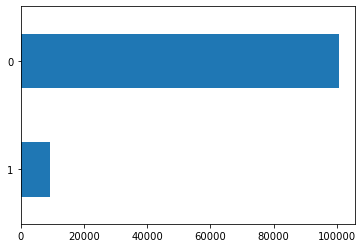

In [19]:
data['default'].value_counts(ascending=True).plot(kind='barh')

In [20]:
data['education'] = data.education.fillna('blank')

In [21]:
data['age_groups'] = data.age.apply(age_gr)

In [22]:
data['app_date'] = pd.to_datetime(data['app_date'])
data['app_date_day'] = data.app_date.dt.day
data['app_date_weekday'] = data.app_date.dt.weekday
data['app_date_month'] = data.app_date.dt.month
data['app_date_year'] = data.app_date.dt.year

In [23]:
data.drop(['client_id','app_date',], axis = 1, inplace=True)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

columns = ['age_groups', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']

for column in columns:
    data[column] = le.fit_transform(data[column])
    
for column in bin_cols:
    data[column] = le.fit_transform(data[column])
    
for column in columns:
    data = pd.get_dummies(data, columns=[column])

In [25]:
data = pd.get_dummies(data, columns=['education'], dummy_na=False)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               110148 non-null  int32  
 1   age               110148 non-null  int64  
 2   car               110148 non-null  int32  
 3   car_type          110148 non-null  int32  
 4   decline_app_cnt   110148 non-null  float64
 5   good_work         110148 non-null  int64  
 6   score_bki         110148 non-null  float64
 7   bki_request_cnt   110148 non-null  float64
 8   income            110148 non-null  float64
 9   foreign_passport  110148 non-null  int32  
 10  sample            110148 non-null  int64  
 11  default           110148 non-null  int64  
 12  app_date_day      110148 non-null  int64  
 13  app_date_weekday  110148 non-null  int64  
 14  app_date_month    110148 non-null  int64  
 15  app_date_year     110148 non-null  int64  
 16  age_groups_0      11

In [27]:
data

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,region_rating_3,region_rating_4,region_rating_5,region_rating_6,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,education_blank
0,1,29,1,1,0.000000,0,-2.271884,1.386294,10.819798,0,...,1,0,0,0,0,1,0,0,0,0
1,0,39,0,0,1.791759,0,-1.504999,1.098612,8.517393,0,...,1,0,0,0,0,0,0,1,0,0
2,1,50,1,1,0.000000,0,-1.691339,0.693147,10.308986,1,...,1,0,0,0,0,0,0,0,1,0
3,1,56,0,0,0.000000,0,-2.374182,0.693147,9.741027,0,...,0,0,0,0,0,0,0,1,0,0
4,0,38,0,0,0.000000,0,-2.487502,0.000000,11.695255,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,0,45,0,0,0.000000,0,-1.792064,1.386294,9.741027,0,...,1,0,0,0,0,1,0,0,0,0
110144,1,41,1,1,0.000000,0,-2.058029,0.693147,11.156265,0,...,1,0,0,0,0,0,0,1,0,0
110145,1,31,0,0,0.000000,0,-1.512635,1.609438,10.714440,0,...,0,0,0,1,0,0,0,1,0,0
110146,0,29,0,0,0.000000,1,-1.479334,1.386294,9.472782,0,...,1,0,0,0,0,0,0,1,0,0


### обучение

In [28]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample', 'default'], axis=1)

y = train_data['default'].values  # наш таргет
X = train_data.drop(['default'], axis=1)

In [29]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
from sklearn.model_selection import train_test_split

# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# проверяем
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59039, 47), (14760, 47), (59039,), (14760,))

In [31]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [32]:
logreg = LogisticRegression(class_weight='balanced', dual=False, fit_intercept=True, 
                            C=1.0, intercept_scaling=1, l1_ratio=None, max_iter=1000,
                            multi_class='auto', n_jobs=None, penalty='none',
                            random_state=None, solver='lbfgs', tol=0.001,
                            verbose=0, warm_start=False)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     12933
           1       0.23      0.69      0.34      1827

    accuracy                           0.67     14760
   macro avg       0.58      0.68      0.56     14760
weighted avg       0.85      0.67      0.73     14760



In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[8652 4281]
 [ 573 1254]]


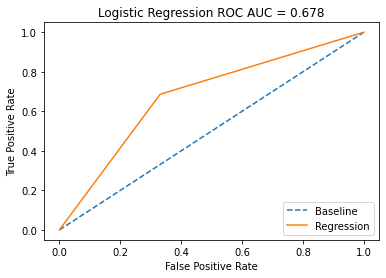

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [36]:
# если качество нас устраивает, обучаем финальную модель на всех обучающи данных
logreg_final = LogisticRegression(class_weight='balanced', dual=False, fit_intercept=True, 
                            C=1.0, intercept_scaling=1, l1_ratio=None, max_iter=1000,
                            multi_class='auto', n_jobs=None, penalty='none',
                            random_state=None, solver='lbfgs', tol=0.001,
                            verbose=0, warm_start=False)
logreg_final.fit(X, y)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='none',
                   tol=0.001)

In [37]:
predict_submission = logreg_final.predict(test_data)

In [38]:
sample_submission['default'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,1
2,75683,0
3,26883,0
4,28862,0
5,99881,1
6,26630,1
7,79934,0
8,16605,0
9,105449,0


In [39]:
sample_submission.describe()

,client_id,default
count,36349.000000,36349.000000
mean,54945.647473,0.375526
std,31706.052195,0.484265
min,4.000000,0.000000
25%,27744.000000,0.000000
50%,54657.000000,0.000000
75%,82322.000000,1.000000
max,110148.000000,1.000000
